# RSA
## Quelques primitives arithmétiques

### L'algorithme d'Euclide étendu

L'**algorithme d'Euclide étendu** est une version de l'algorithme d'Euclide; à partir de deux entiers a et b, l'algorithme calcule leur plus grand commun diviseur (P.G.C.D.) ainsi que deux entiers (les coefficients de Bezout) $u$ et $v$ tels que $a*u + b*v = pgcd(a,b)$. L'algorithme d'Euclide permet d'obtenir de tels entiers parce qu'à chaque étape de l'algorithme, on n'a que des sommes de multiples de a et b.



#### Version itérative

1. Déroulez à la main l’algorithme d’Euclide étendu sur les entiers $120$ et $23$.
2. En vous appuyant de votre cours, concevez puis implémentez une fonction `euclide_etendu(a,b)` qui utilise cette méthode itérative. Votre fonction renverra le pgcd de a et de b ainsi que les coefficients de Bezout associés.

In [26]:
def euclide_etendu(nombre_a,nombre_b):
    """Renvoie un triplet (d,u,v) avec d=pgcd(a,b) et u et v les coefficients de Bezout"""
    bezout_iteration_precedente_u, bezout_iteration_precedente_v, bezout_iteration_courante_u, bezout_iteration_courante_v = 1, 0, 0, 1
    
    while nombre_b != 0:
        quotient = nombre_a // nombre_b
        bezout_iteration_precedente_u, bezout_iteration_courante_u = bezout_iteration_courante_u, bezout_iteration_precedente_u - quotient * bezout_iteration_courante_u
        bezout_iteration_precedente_v, bezout_iteration_courante_v = bezout_iteration_courante_v, bezout_iteration_precedente_v - quotient * bezout_iteration_courante_v
        nombre_a, nombre_b = nombre_b, nombre_a % nombre_b
    return nombre_a, bezout_iteration_precedente_u, bezout_iteration_precedente_v

a, u, v = euclide_etendu(120, 23)

print("PGCD(120, 23) =", a)
print("Coefficients de Bézout: u =",u, ", v =", v)

PGCD(120, 23) = 1
Coefficients de Bézout: u = -9 , v = 47


#### Version récursive

Notons $u$ et $v$ les coefficients de Bezout pour les nombres $a$ et $b$. Notons maintenant $u'$ et $v'$ les coefficients de Bezout pour les nombres $b$ et $a \mod b$. Alors on a la relation de récurrence suivante: $u = v'$, $v = u' - (a/b)\cdot v'$. (Ici, $a/b$ correspond à la division entière de $a$ par $b$.

1. Déduisez de cette propriété une version récursive de l’algorithme en faisant apparaître chaque étape du calcul via des affichages.

In [43]:
def euclide_etendu_rec(a,b):
    """Renvoie un triplet (d,u,v) avec d=pgcd(a,b) et u et v les coefficients de Bezout"""
    if b == 0:
        return a, 1, 0
    else:
        d, u, v = euclide_etendu_rec(b, a % b)
        return d, v, u - (a // b) * v

a, u, v = euclide_etendu_rec(120, 23)


print("PGCD(120, 23) =", a)
print("Coefficients de Bézout: u =", u, ", v =", v)

PGCD(120, 23) = 1
Coefficients de Bézout: u = -9 , v = 47


### Forgeons nos premiers outils

Nous allons maintenant implémenter différents outils de calcul qui nous seront notamment utile pour la partie sur le protocole RSA.

Proposez une implémentation en Python des fonctions suivantes:

* `est_premier(n)`: renvoie `True` si `n` est premier, `False` sinon. On rappelle qu'un nombre entier est premier si et seulement s'il n'est divisible que par 1 et lui-même. 
* `pgcd(a,b)`: renvoie un entier correspondant au plus grand diviseur commun de `a` et `b`.
* `mod_inverse(a,b)`: renvoie l'inverse modulaire de `a` et de `b` (indice: pensez au coefficient de Bezout!)

In [ ]:
import math

def est_premier(n):
    if n < 2:
        return False
    for i in range(2, int(math.sqrt(n))+1):
        if n%i==0:
            return False
    return True

def pgcd(a, b):
    while r1 > 0:
        r = r0 % r1
        r0 = r1
        r1 = r
    return r0

def mod_inverse(a,b):
    pass

True


### Un outil plus technique: l'exponentiation modulaire

Vous devez proposer une fonction Python permettant de calculer l'**exponentiation modulaire** étant donné une base $b$, un exposant $e$ et un entier positif $n$ (aussi appelé *modulus*). Ce calcul est notamment utilisé dans le protocole [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)), que nous étudierons plus en détails par la suite.

1. Commencons par implémenter la méthode la plus simple, qui consiste à effectuer le calcul $b^e$ puis d'appliquer le modulo. Ecrivez une fonction `exp_mod_naive(b,e,n)` qui se contente de faire ce calcul (vous pouvez vous servir des opérateurs Python `**` et `%`).
2. Executez le programme précédent avec les valeurs $b=4\times 10^36$, $e=15$ et $n=301$. Un peu long n'est-ce pas...

In [ ]:
def exp_mod_naive(b,e,n):
    pass

Tentons maintenant d'optimiser notre algorithme. Pour cela, nous nous servirons de la propriété suivante:

$$(x \cdot y) \mod n = [(x \mod n) \cdot (y \mod n)] \mod n$$

1. Si on pose $x=b$ et $y=b^{p-1}$, qu'en déduisez-vous?
2. Ecrivez une fonction `exp_mod_opt(b,e,n)` qui utilise cette propriété.
3. Testez votre fonction avec les valeurs de $b$, $e$ et $n$ fournis précédemment. Constatez-vous une amélioration?

In [ ]:
def exp_mod_opt(b,e,n):
    pass

## Le protocole RSA

### Les grandes lignes

Voici les grandes étapes du chiffrement RSA. Cependant, certaines parties sont manquantes! Complétez les trous.

* Bob choisit $p$ et $q$ deux grands nombres ... (plus de 100 chiffres)
* Bob calcule $n=...$. 
* Le nombre n, **le modulo RSA**, doit posséder plusieurs centaines de chiffres. Il est public tandis que $p$ et $q$ sont conservés secrets !
* Bob calcule $\varphi(n) = (...-1)(...-1)$, qui doit rester secret. Retrouver $n$ sans connaître $p$ et $q$ est aussi difficile que de factoriser $n$.
* Bob choisit $e$ en s'assurant que $PGDC(e, n) = 1$. Il s'agit de **l'exposant d'encryptage RSA**.
* Bob calcule $d$, inverse de $e$ modulo $n$ et garde secret cette valeur. Il s'agit de **la clé ... RSA** qui va permettre de décoder par la suite les messages transmis par Alice.
* Bob transmet (ou publie dans un annuaire) le couple $(n,...)$. Ce couple s'appelle **la clé ... RSA.**
* Alice convertit son message "texte" en un nombre $M$ compris entre 0 et $n$.
* Alice calcule $C\equiv M^{...}\mod n$ et envoie ce message crypté $C$.
* Pour le décoder, Bob calcule $M=C^{...} \mod n$ à l'aide de sa clé privée $d$. Ceci lui permet de retrouver le message d'origine car:
$$C^{d} \equiv (M^{e})^d\equiv M^{e.d} \equiv  M \mod n$$
* Bob n'a plus qu'à reconvertir ce nombre en un message clair.


> Pour déchiffrer le message, on utilise le *petit théorème de Fermat* :
>> Soient $p$ et $q$ deux nombres premiers et $n = p.q$. Alors pour tout $x < n$ premier avec $n$, $x^{(p-1).(q-1)} \equiv 1\mod n$.

> La sécurité de RSA repose sur la difficulté de factoriser le modulo RSA $n$ de la clé publique. 

### Génération de nombres premiers

1. Ecrivez une fonction `genere_premier(maxi)` qui génère un nombre premier aléatoire plus petit que `maxi`. Une solution simple consiste à tirer aléatoirement un nombre entre 2 et `maxi` puis de tester si le nombre obtenu est premier ou non. S'il ne l'est pas, alors on réitère le processus jusqu'à trouver un nombre premier.
1. Ecrivez maintenant une fonction `genere_grand_premier(k)` qui va générer un nombre premier de taille $k$ bits de manière aléatoire. Pour cela, il suffit de remarquer qu'un nombre entier de taille $k$ est compris entre $2^{k-1}$ et $2^{k}-1$. 

In [ ]:
# Ecrivez votre code ici

### Génération de clés RSA

1. Ecrire une fonction `genere_cle()` qui renvoie le triplet `(n,e,d)` d'un chiffrement RSA valide. 
1. Quelle condition doit vérifier le message par rapport à $n$ ? Que faire sinon ? (on ne demande pas de réimplémenter toutes les fonctions ici).

In [ ]:
# Ecrivez votre code ici

### Pourquoi RAS est sûr? 

Parce qu’il est basé sur une dissymétrie fondamentale entre le temps pris pour créer des clés et le temps pris pour les casser... 

#### Voyons cela

1. Créez une fonction `factorisation(n)` qui factorise l’entier $n$ en deux facteurs premiers $p$ et $q$. On se contentera d'une méthode naïve qui consiste à tester tous les couples d'entiers qui sont premiers.

In [ ]:
# Ecrivez votre code ici

Nous allons pour la suite effectuer des mesures du temps d'exécution de certaines fonctions. 

1. Mesurez le temps d'exécution de la fonction `generer_grand_premier(k)` pour les valeurs $k=8$ puis $k=19$. On notera `p1` et `p2` les deux nombres ainsi générés.
1. Mesurez le temps d'exécution de la fonction `factorisation(n)` pour les valeurs `n=p1` puis `n=p2`
1. Quel ratio obtenez-vous?

In [ ]:
# Ecrivez votre code ici

Ecrivez une fonction qui teste l’évolution de ce ratio en fonction du doublement de la taille de la clé à chaque étape de test.

In [ ]:
# Ecrivez votre code ici

Tracez cette courbe en vous inspirant du code ci-dessous

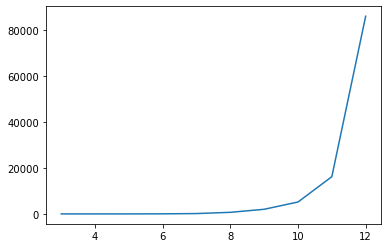

In [ ]:
import matplotlib.pyplot as plt
size=[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
averagetime=[0.0999,1.3,3.9,39,155,689,2021,5187,16213,86038]
plt.plot(size, averagetime)
plt.show()  

### Une version très naïve de l’usage de RSA ...

Imaginons qu'un message M ait été chiffré avec RSA avec la clé publique `(n=95,e=23)`. Plus précisément, chaque lettre a été chiffré séparement avec cette clé. Voici le message crypté ainsi obtenu:

[8,29,52,1,74,0,20,37,0,40,12,52]

1. Seriez-vous capable de retrouver le message $M$ initial?
2. Pourquoi ne faut-il jamais utiliser RSA comme cela?

### Cryptage RSA de deux messages avec le même n

Bob et Cliff ont pour clef publique RSA respectivement $(n, e_1)$ et $(n, e_2)$ avec en plus $e_1$ et $e_2$ premiers entre eux.
Alice envoie le même message $M$ en le cryptant par les clés publiques RSA de Bob et Cliff en $C_1$ et $C_2$.
Expliquer comment Eve, qui intercepte les deux messages cryptés, et qui connait les clés publiques de Bob et Cliff, peut retrouver le message en clair $M$.

#### Indication  

Pensez au théorème de Bezout !

### Essayer avec votre voisin 

Mettez vous par deux (ou trois) et un ou deux étudiants prennent le rôle de Bob et Cliff et codent deux messages RSA avec le même n et vous communiquent les messages codés et n.
Vous devez décoder le message transmis.


### Si on prend $𝑒_1=7$ et $𝑒_2=14$

Toujours avec $n = 101 \times 103$

Pourquoi est-ce que ça ne marche plus ?

## Attaque de RSA pour e petit

Pourquoi RSA peut-il être fragile pour $e$ "petit" ? Par exemple inférieur à 10 ou de l'ordre de quelques dizaines ? Faites des recherches et coder des éléments d'une attaque possible dans ce cas 

## Tests de primalité
On voit que tester la primalité est primordial pour RSA
Reprenons un peu cette étude

In [ ]:
gie = 15508808027837692984239215007513078784710202152067111027931119901138753945534599997576053046717358560915975553897974089381733440436747047809863900699066790967289330811405044935969514508676239942493440750589270015739962374529363251827
est_premier(gie)



False

In [108]:
# trop loooooonng
est_premier(1051364518442342302270880192779903262713)

KeyboardInterrupt: 

In [ ]:
# pow a 3 arguments (modulo sur le dernier)
pow(2,4,10)

6

Pour résoudre ce problème, implantez le test de primalité probabiliste de Fermat. Le principe de ce test est de choisir aléatoirement et uniformément un entier $a$ et de tester si $a^{n-1} \not\equiv 1 \mod n$. Si c'est le cas, alors $n$ n'est pas premier. On répète ce test $k$ fois. Si aucune itération ne permet de prouver que $n$ est composite, alors il est considéré comme *probablement premier*. Il suffit ensuite de vérifier par une méthode déterministe s'il est vraiment premier ou non.

In [ ]:
def fermat_test(n,k=10):
    pass

In [ ]:
fermat_test(1051364518442342302270880192779903262713)

In [ ]:
fermat_test(275478901)

In [ ]:
fermat_test(gie)

In [ ]:
%%bash
openssl --help

help:

Standard commands
asn1parse         ca                ciphers           cmp               
cms               crl               crl2pkcs7         dgst              
dhparam           dsa               dsaparam          ec                
ecparam           enc               engine            errstr            
fipsinstall       gendsa            genpkey           genrsa            
help              info              kdf               list              
mac               nseq              ocsp              passwd            
pkcs12            pkcs7             pkcs8             pkey              
pkeyparam         pkeyutl           prime             rand              
rehash            req               rsa               rsautl            
s_client          s_server          s_time            sess_id           
smime             speed             spkac             srp               
storeutl          ts                verify            version           
x509              

Messag

### A faire chez vous: Utilisation de Openssl

Le logiciel [OpenSSL](https://www.openssl.org/) regroupe des implémentations de méthodes cryptographiques. 

Nous découvrirons cet outil en détails lors du prochain TP. Afin de gagner du temps, cherchez comment effectuer toutes ces tâches:

* Création d’un mot de passe et son hashage
* Création d’une clé rsa
* Utilisation de la clé
* Creer un certificat autosigné et le vérifier
* Récupérer via les parametre de firefox le certificat d’amazone et le verifier:
* Vérifiez le hachage de la clé publique pour vérifier qu’il correspond à un CSR ou à une clé privée
* Créer un CSR pour une demande de signature de clé privée et de certificat